In [ ]:
import numpy as np
import pandas as pd
from google.colab import files 
uploaded = files.upload()
child_mortality = pd.read_excel('whole world.xlsx',skiprows=2)
df_child_mortality = pd.DataFrame(data = child_mortality)
# df_child_mortality.describe()

Saving whole world.xlsx to whole world.xlsx


In [ ]:
df_child_mortality.head(10)

,Location,Dim2,Indicator,Period,Dim1,Tooltip,IndicatorCode,FactValueForMeasure,FactValueString,FactValueUoM,FactComments,LanguageName,'Facts'[LANGUAGE_CODE],LanguageOrder,SpaceTime,TimeDimValueCode,DataSourceDimValueCode,SpatialDimValueCode,Dim1ValueCode,Dim2ValueCode,Dim3ValueCode,SlicingDimCode,SlicingDimValueCode,IsLatestYear,LatestYearLabel,FactValueNumericPrefix,DateModified,ClassBreakId,LegendLabelText,LegendColorForText,LegendColorMaxNumeric,LegendColorMinNumeric,BasemapURL,LabelMapURL,LabelMapLanguage
0,Afghanistan,HIV/AIDS,Number of deaths,2017,0-27 days,0.17,MORT_100,0.17,NaN,NaN,NaN,English,en,1,AFG,2017,NaN,AFG,DAYS0-27,CH2,NaN,NaN,NaN,True,Latest,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,HIV/AIDS,Number of deaths,2017,1-59 months,16.83,MORT_100,16.83,NaN,NaN,NaN,English,en,1,AFG,2017,NaN,AFG,MONTHS1-59,CH2,NaN,NaN,NaN,True,Latest,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,HIV/AIDS,Number of deaths,2017,0-4 years,17.00,MORT_100,17.00,NaN,NaN,NaN,English,en,1,AFG,2017,NaN,AFG,YEARS0-4,CH2,NaN,NaN,NaN,True,Latest,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,HIV/AIDS,Number of deaths,2016,0-27 days,0.17,MORT_100,0.17,NaN,NaN,NaN,English,en,1,AFG,2016,NaN,AFG,DAYS0-27,CH2,NaN,NaN,NaN,False,2016,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,HIV/AIDS,Number of deaths,2016,1-59 months,16.83,MORT_100,16.83,NaN,NaN,NaN,English,en,1,AFG,2016,NaN,AFG,MONTHS1-59,CH2,NaN,NaN,NaN,False,2016,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,HIV/AIDS,Number of deaths,2016,0-4 years,17.00,MORT_100,17.00,NaN,NaN,NaN,English,en,1,AFG,2016,NaN,AFG,YEARS0-4,CH2,NaN,NaN,NaN,False,2016,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,HIV/AIDS,Number of deaths,2015,0-27 days,0.17,MORT_100,0.17,NaN,NaN,NaN,English,en,1,AFG,2015,NaN,AFG,DAYS0-27,CH2,NaN,NaN,NaN,False,2015,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,HIV/AIDS,Number of deaths,2015,1-59 months,16.83,MORT_100,16.83,NaN,NaN,NaN,English,en,1,AFG,2015,NaN,AFG,MONTHS1-59,CH2,NaN,NaN,NaN,False,2015,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,HIV/AIDS,Number of deaths,2015,0-4 years,17.00,MORT_100,17.00,NaN,NaN,NaN,English,en,1,AFG,2015,NaN,AFG,YEARS0-4,CH2,NaN,NaN,NaN,False,2015,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,HIV/AIDS,Number of deaths,2014,0-27 days,0.17,MORT_100,0.17,NaN,NaN,NaN,English,en,1,AFG,2014,NaN,AFG,DAYS0-27,CH2,NaN,NaN,NaN,False,2014,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dropping the columns with redundant and NAN Values
df_child_mortality = df_child_mortality.drop(columns=['FactValueString','FactValueUoM','FactComments','DataSourceDimValueCode','Dim3ValueCode',
                                 'SlicingDimCode','SlicingDimValueCode','LanguageName',
                                 'FactValueNumericPrefix','DateModified','ClassBreakId','LegendLabelText','LegendColorForText', 
                                 'LegendColorMaxNumeric','LegendColorMinNumeric','BasemapURL','LabelMapURL','LabelMapLanguage',
                                 'IsLatestYear','LatestYearLabel','Dim2ValueCode','SpatialDimValueCode','LanguageOrder',
                                 'TimeDimValueCode','Dim1ValueCode','FactValueForMeasure','Indicator','IndicatorCode'])
df_child_mortality = df_child_mortality.drop(df_child_mortality.columns[5], axis=1) #Cleaning the unwanted column
df_child_mortality = df_child_mortality.rename(columns={"Dim2": "Reason", "Dim1": "AgeGroup", "Period": "Year","Tooltip" : "Deaths"}, errors="raise")
print(df_child_mortality.shape)
df_child_mortality.describe()

(147762, 6)


,Year,Deaths
count,147762.000000,147762.000000
mean,2008.486397,1830.014304
std,5.183150,11319.173549
min,2000.000000,0.000000
25%,2004.000000,0.028000
50%,2008.000000,24.320000
75%,2013.000000,477.400000
max,2017.000000,487137.000000


In [ ]:
new_df = df_child_mortality

In [ ]:
x = new_df.groupby("Location").sum()
x = x.sort_values(by='Deaths', ascending=False)

In [ ]:
list_countries = x.index.tolist()
list_countries = list_countries[0:50]
# list_countries[0:50]

In [ ]:
dataset_final = new_df[new_df.Location.isin(list_countries)]

In [ ]:
dataset_final

,Location,Reason,Year,AgeGroup,Deaths,SpaceTime
0,Afghanistan,HIV/AIDS,2017,0-27 days,0.17,AFG
1,Afghanistan,HIV/AIDS,2017,1-59 months,16.83,AFG
2,Afghanistan,HIV/AIDS,2017,0-4 years,17.00,AFG
3,Afghanistan,HIV/AIDS,2016,0-27 days,0.17,AFG
4,Afghanistan,HIV/AIDS,2016,1-59 months,16.83,AFG
...,...,...,...,...,...,...
147757,Zimbabwe,Injuries,2001,1-59 months,1030.00,ZWE
147758,Zimbabwe,Injuries,2001,0-4 years,1106.00,ZWE
147759,Zimbabwe,Injuries,2000,0-27 days,72.03,ZWE
147760,Zimbabwe,Injuries,2000,1-59 months,957.80,ZWE


In [ ]:
dataset_final.isna().sum()
dataset_final = dataset_final[(dataset_final.SpaceTime != "WBDCP_SSA")]
# df_child_mortality.groupby("AgeGroup")["Tooltip"].mean()
#Category for the Age group of 0-27, 1-59, 0-4
category_1 = dataset_final[dataset_final.AgeGroup == "0-27 days"].index.tolist()
category_2 = dataset_final[dataset_final.AgeGroup == "1-59 months"].index.tolist()
category_3 = dataset_final[dataset_final.AgeGroup == "0-4 years"].index.tolist()

dataset_final.loc[category_1, "Category"] = "1"
dataset_final.loc[category_2, "Category"] = "2"
dataset_final.loc[category_3, "Category"] = "3"



In [ ]:
 

dataset_final = dataset_final[dataset_final.AgeGroup =='0-4 years']

In [ ]:
dataset_final['Reason'].unique()

array(['HIV/AIDS', 'Diarrhoeal diseases', 'Pertussis', 'Tetanus',
       'Measles', 'Meningitis/encephalitis', 'Malaria',
       'Acute lower respiratory infections', 'Prematurity',
       'Birth asphyxia and birth trauma',
       'Sepsis and other infectious conditions of the newborn',
       'Other communicable, perinatal and nutritional conditions',
       'Congenital anomalies', 'Other noncommunicable diseases',
       'Injuries'], dtype=object)

In [ ]:
grouped_df = dataset_final.groupby(['Location','Year'], as_index=False).agg({'Deaths':['sum']})

grouped_df  = grouped_df.rename(columns={'Location':'Country'})
grouped_df.head(10)

,Country,Year,Deaths
,,,sum
0,Afghanistan,2000,126578.92
1,Afghanistan,2001,131386.92
2,Afghanistan,2002,124658.00
3,Afghanistan,2003,117839.10
4,Afghanistan,2004,117196.50
5,Afghanistan,2005,117360.00
6,Afghanistan,2006,120168.00
7,Afghanistan,2007,112389.00
8,Afghanistan,2008,109295.00


In [ ]:
uploaded = files.upload()
x = pd.read_csv('Expected years of schooling, female (years).csv',skiprows=12)
school = pd.DataFrame(data = x)

Saving Expected years of schooling, female (years).csv to Expected years of schooling, female (years) (1).csv


In [ ]:
school = school.dropna(how='all',axis='columns')
school = school.dropna(how='all',axis='rows'

,HDI Rank,Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 29
1,169,Afghanistan,..,..,0.6,4.9,7.2,7.4,7.5,7.6,7.7,7.8,7.9,8,7.9,7.7,a
3,69,Albania,11.3,10.1,10.6,11.4,13.6,14.4,14.6,14.7,14.8,14.8,14.9,15,15.8,15.5,a
5,91,Algeria,..,..,11,12.4,14.2,14.5,14.1,14.5,14.6,14.6,14.7,14.9,14.9,14.8,a
7,148,Angola,..,3.5,4.5,6.4,7.5,7.2,8.7,8.7,8.7,8.7,11,11,11,11,"a,b"
9,78,Antigua and Barbuda,..,..,..,13.8,13.1,13,13.4,13.4,13.1,13.1,13.1,13.1,13.1,13.2,"a,c"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,e: Updated by HDRO based on data from CEDLAS a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,f: Based on data from the national statistical...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,g: Based on cross-country regression.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,h: Updated by HDRO based on data from United N...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
school.head()

,HDI Rank,Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 29
1,169,Afghanistan,..,..,0.6,4.9,7.2,7.4,7.5,7.6,7.7,7.8,7.9,8,7.9,7.7,a
3,69,Albania,11.3,10.1,10.6,11.4,13.6,14.4,14.6,14.7,14.8,14.8,14.9,15,15.8,15.5,a
5,91,Algeria,..,..,11,12.4,14.2,14.5,14.1,14.5,14.6,14.6,14.7,14.9,14.9,14.8,a
7,148,Angola,..,3.5,4.5,6.4,7.5,7.2,8.7,8.7,8.7,8.7,11,11,11,11,"a,b"
9,78,Antigua and Barbuda,..,..,..,13.8,13.1,13,13.4,13.4,13.1,13.1,13.1,13.1,13.1,13.2,"a,c"


In [ ]:

school = school[['HDI Rank', 'Country', '2000', '2005', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
school['Country'] = school['Country'].str.strip()
countries = school['Country'].unique().tolist()
top50 = ['India',
 'Nigeria',
 'Pakistan',
 'China',
 'Congo, Dem. Rep.',
 'Ethiopia',
 'Bangladesh',
 'Indonesia',
 'Tanzania',
 'Angola',
 'Uganda',
 'Mozambique',
 'Afghanistan',
 'Niger',
 'Sudan',
 'Mali',
 'Kenya',
 'Cote d\'Ivoire',
 'Cameroon',
 'Somalia',
 'Burkina Faso',
 'Chad',
 'Philippines',
 'Myanmar',
 'South Africa',
 'Brazil',
 'Egypt, Arab Rep.',
 'Ghana',
 'Malawi',
 'Yemen, Rep.',
 'Zambia',
 'Madagascar',
 'Guinea',
 'Mexico',
 'South Sudan',
 'Sierra Leone',
 'Benin',
 'Zimbabwe',
 'Iraq',
 'Nepal',
 'Senegal',
 'Vietnam',
 'Burundi',
 'United States',
 'Turkey',
 'Rwanda',
 'Iran, Islamic Rep.',
 'Central African Republic',
 'Haiti',
 'Uzbekistan']

school50 = school[school['Country'].isin(top50)]
school50 = school50.drop(columns={'HDI Rank'})
years = school50.melt(id_vars=['Country'], var_name='Year', value_name='Mean Years of Schooling')
years

,Country,Year,Mean Years of Schooling
0,Afghanistan,2000,0.6
1,Angola,2000,4.5
2,Bangladesh,2000,7.2
3,Benin,2000,4.9
4,Brazil,2000,14.5
...,...,...,...
583,Uzbekistan,2019,11.9
584,Vietnam,2019,12.9
585,"Yemen, Rep.",2019,7.4
586,Zambia,2019,10.7


dtype('O')

In [ ]:

years['Year'] = years['Year'].astype(int)
years['Year'].dtype

dtype('int64')

In [ ]:
merge_school_mortality = pd.merge(grouped_df, years,on=['Country','Year'],how='inner')

#df.columns.tolist()
merge_school_mortality

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,Country,Year,"(Country, )","(Year, )","(Deaths, sum)",Mean Years of Schooling
0,Afghanistan,2000,Afghanistan,2000,126578.92,0.6
1,Afghanistan,2005,Afghanistan,2005,117360.00,4.9
2,Afghanistan,2010,Afghanistan,2010,102919.00,7.2
3,Afghanistan,2011,Afghanistan,2011,99331.00,7.4
4,Afghanistan,2012,Afghanistan,2012,95248.00,7.5
...,...,...,...,...,...,...
405,Zimbabwe,2013,Zimbabwe,2013,34633.40,10.1
406,Zimbabwe,2014,Zimbabwe,2014,32113.40,10.1
407,Zimbabwe,2015,Zimbabwe,2015,30271.40,10.2
408,Zimbabwe,2016,Zimbabwe,2016,28214.85,10.2


NameError: ignored

In [ ]:
cols = [2,3]
merge_school_mortality.drop(merge_school_mortality.columns[cols],axis=1,inplace=True)
merge_school_mortality.rename(columns = {merge_school_mortality.columns[2]: 'Deaths'}, inplace = True)

merge_school_mortality[2:10]

,Country,Year,Deaths,Mean Years of Schooling
2,Afghanistan,2010,102919.0,7.2
3,Afghanistan,2011,99331.0,7.4
4,Afghanistan,2012,95248.0,7.5
5,Afghanistan,2013,89519.4,7.6
6,Afghanistan,2014,85306.3,7.7
7,Afghanistan,2015,82957.0,7.8
8,Afghanistan,2016,79623.0,7.9
9,Afghanistan,2017,77918.0,8


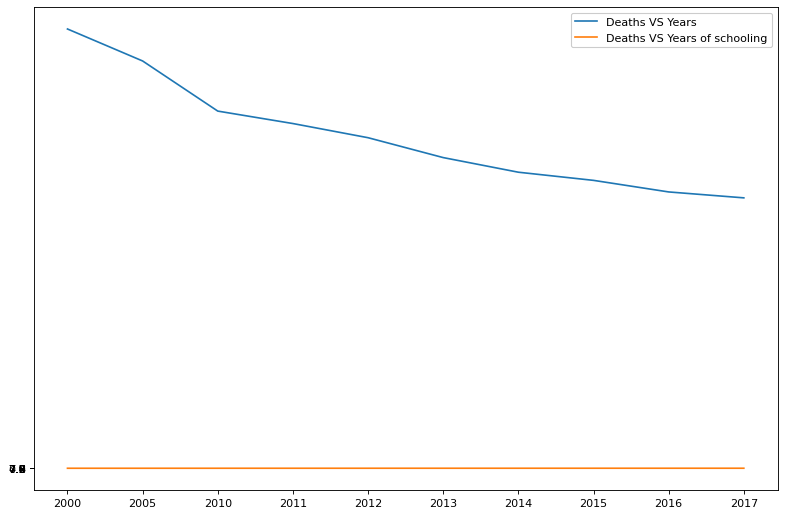

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
afg = merge_school_mortality[merge_school_mortality.Country=='Afghanistan']
y = afg['Deaths']
x=afg['Year']
plt.plot(x,y,label='Deaths VS Years')

y1 = afg['Mean Years of Schooling']
x1 =afg['Year']
plt.plot(x1,y1,label='Deaths VS Years of schooling')
plt.legend(framealpha=1, frameon=True);

In [ ]:
indexNames =merge_school_mortality[merge_school_mortality['Mean Years of Schooling'] == '..'].index 
merge_school_mortality.drop(indexNames , inplace=True)
merge_school_mortality['Mean Years of Schooling'] = merge_school_mortality['Mean Years of Schooling'].astype(float)
#merge_school_mortality['Year'] = merge_school_mortality['Year'].astype(float)


In [ ]:
merge_school_mortality = merge_school_mortality[merge_school_mortality.Country== 'Afghanistan']

In [ ]:
from sklearn.model_selection import train_test_split
x,y = merge_school_mortality[['Mean Years of Schooling', 'Year']], merge_school_mortality.Deaths;
merge_school_mortality.dtypes

Country                     object
Year                         int64
Deaths                     float64
Mean Years of Schooling    float64
dtype: object

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=56)

# import the regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
  
# create a regressor object
regressor = DecisionTreeRegressor(max_depth = 3, criterion = "friedman_mse", random_state = 0) 
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3, criterion = "friedman_mse"),
                          n_estimators=72, random_state=0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
         

In [ ]:
y_pred = regressor.predict(X_test)
y_pred1= regr_2.predict(X_test)
# print the predicted Deaths
print("Predicted deaths: ", y_pred) 
print("Actual deaths: ", y_test) 

Predicted deaths:  [ 89519.4  126578.92]
Actual deaths:  6     85306.3
1    117360.0
Name: Deaths, dtype: float64


In [ ]:
import sklearn.metrics as sm

#Output of Decision Tree Regressor
y_pred = regressor.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean absolute error = 6716.01
Mean squared error = 51369348.79
Median absolute error = 6716.01
Explain variance score = 0.98
R2 score = 0.8


In [ ]:
import sklearn.metrics as sm

#Output of ADA Boost Regressor
y_pred1 = regr_2.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred1), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred1), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred1), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred1), 2))

Mean absolute error = 9327.05
Mean squared error = 113146346.3
Median absolute error = 9327.05
Explain variance score = 0.66
R2 score = 0.56


In [ ]:
merge_school_mortality.to_excel("output_years_of_schooling.xlsx")

In [ ]:
from google.colab import  files
merge_school_mortality.to_excel("output_years_of_schooling.xlsx")
files.download("output_years_of_schooling.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

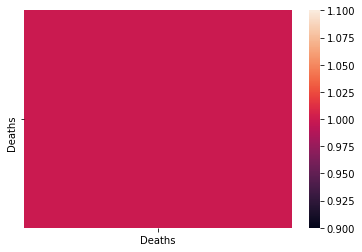

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(merge_school_mortality.corr())